<a href="https://colab.research.google.com/github/noyesachopppp/License-Plate/blob/main/igeolonaelggoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!git clone https://github.com/misbah4064/yolo-license-plate-detection.git '/gdrive/My Drive/Last0171'

fatal: destination path '/gdrive/My Drive/Last0171' already exists and is not an empty directory.


In [3]:
!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc 



In [4]:
#Encryption(암호화하기): Mask_비식별화
import cv2
import numpy as np
from numpy import random

def objectDetector(img):
    yolo = cv2.dnn.readNet("/content/model.weights", "/gdrive/My Drive/Last0171/darknet-yolov3.cfg")
    classes = []

    with open("/gdrive/My Drive/Last0171/classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (0,0,255)
    colorGreen = (0,255,0)
    colorWhite = (255,255,255)

    height, width, channels = img.shape
    #이미지 중심점 추출
    (height,width)=img.shape[:2]
    center = (width // 2, height // 2)
    
    #키 생성 
    key = random.randint(256, size = (height, width, channels))

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    tmp = np.zeros(img.shape[:2], dtype="uint8")
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            #비식별화 코드 
            tmp =img[y:y+h, x:x+w, :]= img[y:y+h, x:x+w, :]^ key[y:y+h, x:x+w, :]
           
    return img

In [6]:
#비식별화_이미지 연습1
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("/gdrive/My Drive/Last0171/car0.JPG")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

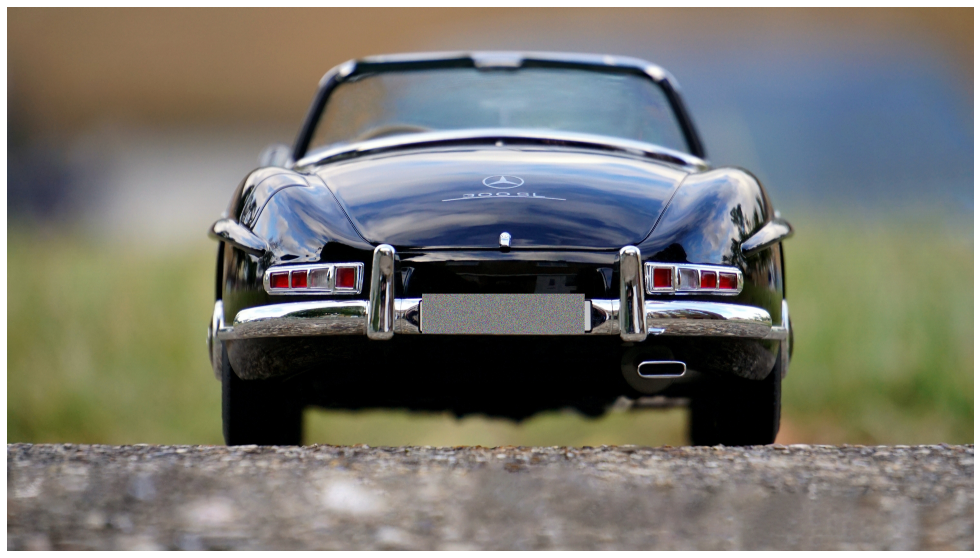

In [ ]:
#비식별화 이미지 연습2
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("/gdrive/My Drive/Last0171/car1.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

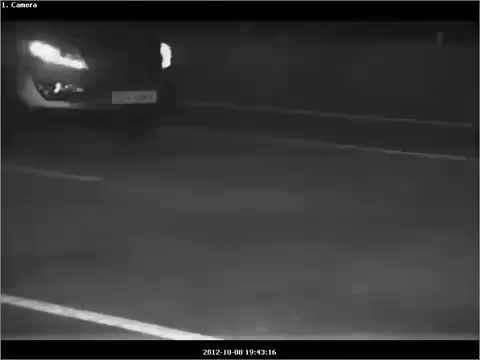

In [ ]:
#최종 비식별화 CCTV 영상 검출
from IPython.display import clear_output, Image
import base64
def arrayShow(imageArray):
  ret, png = cv2.imencode('.png',imageArray)
  encoded = base64.b64encode(png)
  return Image(data=encoded.decode('ascii'))

cap = cv2.VideoCapture("/gdrive/My Drive/Last0171/realcctv.mp4")
while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret==True):
      clear_output(wait=True)
      output_img = objectDetector(frame)
      img = arrayShow(output_img)
      display(img)
      if cv2.waitKey(1) & 0xFF == ord('q'):
               break;
    else:
      break;

In [ ]:
#Decryption (복호화하기) : Unmask_재식별화 
import cv2
import numpy as np
from numpy import random

def objectDetector(img):
    yolo = cv2.dnn.readNet("/content/model.weights", "/gdrive/My Drive/Last0171/darknet-yolov3.cfg")
    classes = []

    with open("/gdrive/My Drive/Last0171/classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (0,0,255)
    colorGreen = (0,255,0)
    colorWhite = (255,255,255)

    height, width, channels = img.shape
    #이미지 중심점 추출
    (height,width)=img.shape[:2]
    center = (width // 2, height // 2)
    
    #키 생성 
    key = random.randint(256, size = (height, width, channels))

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    tmp = np.zeros(img.shape[:2], dtype="uint8")
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            #비식별화 코드 (한번 복호화)
            tmp =img[y:y+h, x:x+w, :]= img[y:y+h, x:x+w, :]^ key[y:y+h, x:x+w, :]^key[y:y+h, x:x+w, :]
           
            
           
    return img

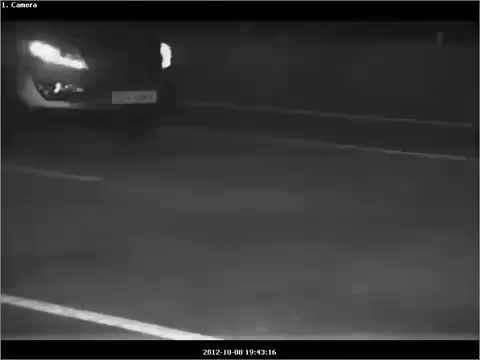

In [ ]:
#최종 재식별화(복원) CCTV 영상 검출
from IPython.display import clear_output, Image
import base64
def arrayShow(imageArray):
  ret, png = cv2.imencode('.png',imageArray)
  encoded = base64.b64encode(png)
  return Image(data=encoded.decode('ascii'))

cap = cv2.VideoCapture("/gdrive/My Drive/Last0171/realcctv.mp4")
while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret==True):
      clear_output(wait=True)
      output_img = objectDetector(frame)
      img = arrayShow(output_img)
      display(img)
      if cv2.waitKey(1) & 0xFF == ord('q'):
               break;
    else:
      break;

In [ ]:
import cv2

if __name__ == '__main__' :


    video = cv2.VideoCapture("/gdrive/My Drive/Last0171/realcctv.mp4");

    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
 
    if int(major_ver)  < 3 :
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        fps = video.get(cv2.CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
 
video.release()


Frames per second using video.get(cv2.CAP_PROP_FPS) : 15.0
